In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Root@1234",
    database="sales_analysis"
)
cursor = conn.cursor()

# Query for Monthly Revenue Trends
query = """
SELECT DATE_FORMAT(order_date, '%Y-%m') AS month, SUM(total_revenue) AS monthly_revenue 
FROM online_sales 
GROUP BY month 
ORDER BY month;
"""
cursor.execute(query)
data = cursor.fetchall()

# Convert Data to Pandas DataFrame
df = pd.DataFrame(data, columns=['Month', 'Revenue'])
df['Month'] = pd.to_datetime(df['Month'])

# Close Connection
cursor.close()
conn.close()

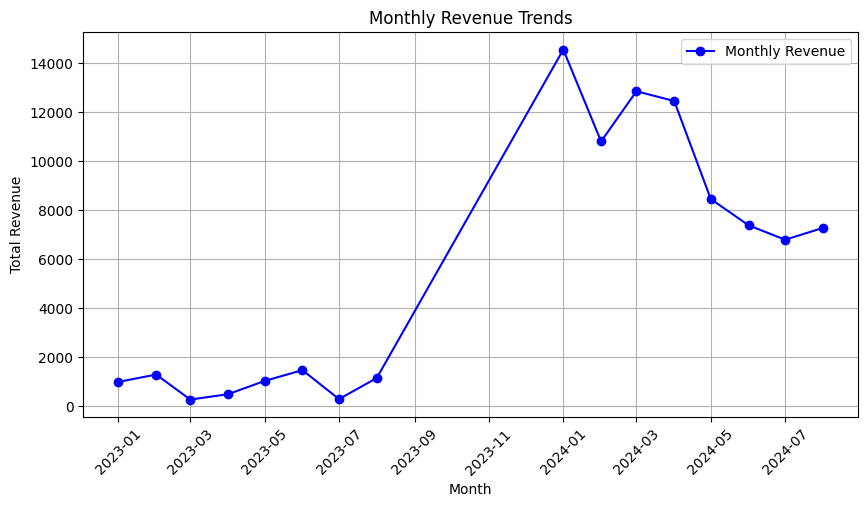

In [2]:
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Revenue'], marker='o', linestyle='-', color='b', label="Monthly Revenue")

# Formatting the chart
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trends")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the chart
plt.show()

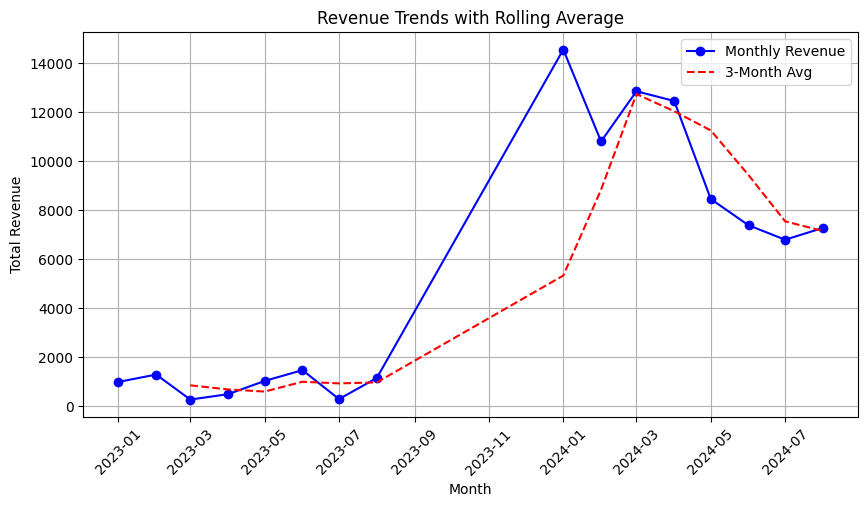

In [3]:
df['Rolling_Avg'] = df['Revenue'].rolling(window=3).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Revenue'], marker='o', linestyle='-', color='b', label="Monthly Revenue")
plt.plot(df['Month'], df['Rolling_Avg'], linestyle='--', color='r', label="3-Month Avg")

plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Revenue Trends with Rolling Average")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()